<a href="https://colab.research.google.com/github/Preranakh/Machine-Learning-Projects/blob/main/Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
a = files.upload()
import pandas as pd


In [ ]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()


,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
import numpy as np
np.unique(df_train['Sentiment'])

df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

df_train.head(15)


,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


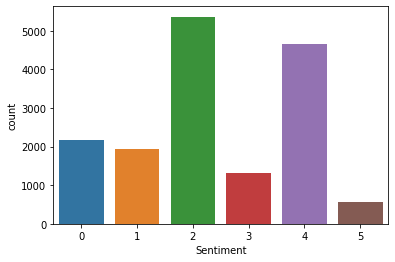

In [ ]:
import seaborn as sns
sns.countplot(x="Sentiment",data=df_train)

In [ ]:
df_train.isnull().sum()

df_train.info()

df_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
x = df_train["Input"]
y = df_train["Sentiment"]

x.head()

y.head()

print(x.shape,y.shape)



(16000,) (16000,)


In [ ]:
message = x.copy()
voc_size = 10000

message[0]

'i didnt feel humiliated'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus[0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'didnt feel humili'

In [ ]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

one_hot_representation = [one_hot(words,voc_size) for words in corpus]

one_hot_representation[0]

from keras.preprocessing.sequence import pad_sequences

sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]



array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 7790, 8404, 1597], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

final_input = np.array(embedded_doc)
final_output = np.array(y)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


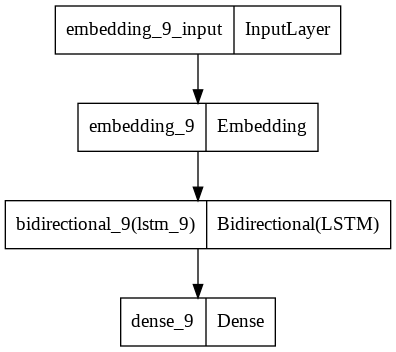

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64)

def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


Epoch 1/30
168/168 [==============================] - 12s 52ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/30
168/168 [==============================] - 8s 47ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/30
168/168 [==============================] - 8s 47ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/30
168/168 [==============================] - 8s 46ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/30
168/168 [==============================] - 8s 49ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/30
168/168 [==============================] - 8s 46ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/30
168/168 [==============================] - 8s 47ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/30
168/168 [====================

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional


In [ ]:
def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]

  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict(np.array(embedded_docs))
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")
x = str(input())
suicide_avoider(x)

wow,yayyyyy
person is in fear


In [ ]:
model.save("suicide.h5")